## Exploratory Analysys from 2016 ENEM

This dataset was available for AceleraDev 2020 challenge, from Codenation. It brings data from the biggest national exam for college admissions in Brazil. 

**Question to be answered:** having internet at home and the level of schooling of the mother has any influence on the mathmatics grade of the students? How this develelop in each gender?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
# verifiyng lines and columns
df.shape

(13730, 167)

In [5]:
# verifiyng all columns
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [6]:
# creating a dataset with columns that I'm interested in
# Q025 stands for internet at home and Q002 stands for mother schooling
dataset1 = df[['TP_SEXO', 'NU_IDADE', 'NU_NOTA_MT', 'Q025', 'Q002', 'TP_COR_RACA']]

In [7]:
print(f'The new dataset placed in the variable dataset1 has {dataset1.shape[0]} rows and {dataset1.shape[1]} columns.')

The new dataset placed in the variable dataset1 has 13730 rows and 6 columns.


In [8]:
dataset1.head(10)

,TP_SEXO,NU_IDADE,NU_NOTA_MT,Q025,Q002,TP_COR_RACA
0,M,24,399.4,A,D,1
1,F,17,459.8,A,A,3
2,F,21,NaN,A,D,3
3,F,25,NaN,B,E,0
4,M,28,NaN,A,D,2
5,F,18,364.5,B,E,1
6,F,18,529.2,B,D,3
7,F,18,566.7,B,F,1
8,F,16,372.4,B,E,3
9,M,24,NaN,B,E,4


In [9]:
# creating dataframe to visualize missing data: column, type of data and total of missing values
# create a dictionary with keys as column names and values with the functions 
# dtypes for types and isna().sum() for sum of missing values
pd.DataFrame({'type':dataset1.dtypes, 'NaN':dataset1.isna().sum()})

,type,NaN
TP_SEXO,object,0
NU_IDADE,int64,0
NU_NOTA_MT,float64,3597
Q025,object,0
Q002,object,0
TP_COR_RACA,int64,0


### Altering row's type of data for better visualization
Some data in int format will be changed into str format. This should not be done if you are interested in Machine Learning with this dataset.

In [10]:
# race
dataset1['TP_COR_RACA'] = dataset1['TP_COR_RACA'].map({0:'Na', 1:'Caucasian', 2:'Black', 3:'Brown', 4:'Yellow', 5:'indigenous'})

<ipython-input-10-4554da634ac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['TP_COR_RACA'] = dataset1['TP_COR_RACA'].map({0:'Na', 1:'Caucasian', 2:'Black', 3:'Brown', 4:'Yellow', 5:'indigenous'})


In [11]:
# internet
dataset1['Q025'] = dataset1['Q025'].map({'A': 'No', 'B': 'Yes'})

<ipython-input-11-769292251e2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Q025'] = dataset1['Q025'].map({'A': 'No', 'B': 'Yes'})


In [12]:
# mother schooling
# F1: fundamental school (1 to 4th grade), F2: fundamental school (5h to 8h grade)
# HS: High school
dataset1['Q002'] = dataset1['Q002'].map({'A':'Never studied', 'B': 'F1 not completed', 'C': 'F2 not completed', 
                                         'D': 'HS not completed', 'E': 'No graduation', 'F':'Graduation', 'G':'post graduated',
                                        'H': 'Not known'})

<ipython-input-12-5de642fb7e2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['Q002'] = dataset1['Q002'].map({'A':'Never studied', 'B': 'F1 not completed', 'C': 'F2 not completed',


In [13]:
# visualizing modifications that were made
dataset1.head(10)

,TP_SEXO,NU_IDADE,NU_NOTA_MT,Q025,Q002,TP_COR_RACA
0,M,24,399.4,No,HS not completed,Caucasian
1,F,17,459.8,No,Never studied,Brown
2,F,21,NaN,No,HS not completed,Brown
3,F,25,NaN,Yes,No graduation,Na
4,M,28,NaN,No,HS not completed,Black
5,F,18,364.5,Yes,No graduation,Caucasian
6,F,18,529.2,Yes,HS not completed,Brown
7,F,18,566.7,Yes,Graduation,Caucasian
8,F,16,372.4,Yes,No graduation,Brown
9,M,24,NaN,Yes,No graduation,Yellow


### Ploting Graphs: categorical variables

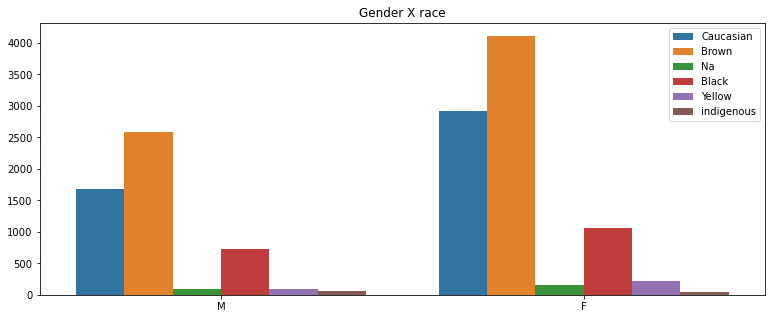

In [14]:
# graph gender x race
plt.figure(figsize=(13,5))
sns.countplot(dataset1['TP_SEXO'],hue=dataset1['TP_COR_RACA'],dodge=True)
plt.title('Gender X race')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best') # loc=best inpus the leggend of the dataset itself
plt.show()


In [15]:
# gender percent
gender = (dataset1['TP_SEXO'].value_counts()/dataset1.shape[0])*100
print(gender)

F    61.84268
M    38.15732
Name: TP_SEXO, dtype: float64


In [16]:
# race percent
race = (dataset1['TP_COR_RACA'].value_counts()/dataset1.shape[0])*100
print(race)

Brown         48.747269
Caucasian     33.423161
Black         13.066278
Yellow         2.272396
Na             1.755280
indigenous     0.735615
Name: TP_COR_RACA, dtype: float64


**Observations:** there is a majority of women taking the test (61.8%). Nearly half of the students that applied consider themselves as 'brown'. Caucasian comes in second place with 33%.

<function matplotlib.pyplot.show(*args, **kw)>

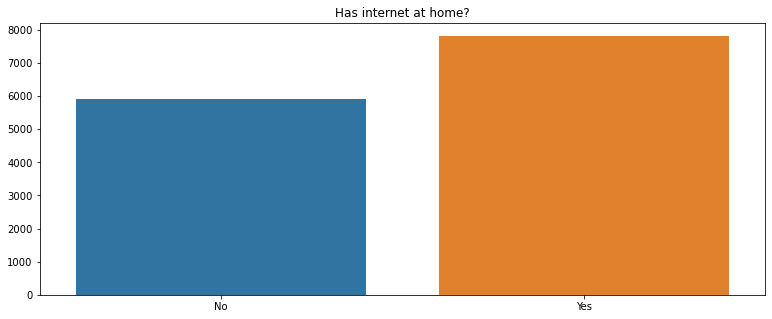

In [17]:
# graph internet
plt.figure(figsize=(13,5))
sns.countplot(dataset1['Q025'],dodge=True)
plt.title('Has internet at home?') 
plt.xlabel('')
plt.ylabel("")
plt.show

In [18]:
# there is a 13% difference in the matter 'have internert at home'
internet = (dataset1['Q025'].value_counts()/dataset1.shape[0])*100
print(internet)

Yes    56.919155
No     43.080845
Name: Q025, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

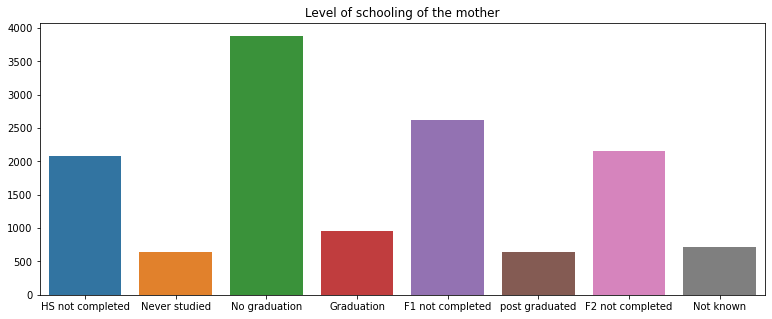

In [19]:
# mother schooling
# for rotating labels: plt.xticks(rotation=90)
plt.figure(figsize=(13,5))
sns.countplot(dataset1['Q002'])
plt.title('Level of schooling of the mother')
plt.xlabel("")
plt.ylabel("")
plt.show

In [20]:
schooling = (dataset1['Q002'].value_counts()/dataset1.shape[0])*100
print(schooling)

No graduation       28.281136
F1 not completed    19.133285
F2 not completed    15.746540
HS not completed    15.171158
Graduation           7.021122
Not known            5.243991
post graduated       4.719592
Never studied        4.683176
Name: Q002, dtype: float64


**Observations:**

34% of mothers did not reach high school.

15% reached high school, but did not finish it.

28% finished high school. 

### Ploting Graphs: numerical variables

In [21]:
dataset1.describe()

,NU_IDADE,NU_NOTA_MT
count,13730.000000,10133.000000
mean,21.593809,482.497928
std,7.043654,99.826323
min,13.000000,0.000000
25%,17.000000,408.900000
50%,19.000000,461.200000
75%,23.000000,537.600000
max,67.000000,952.000000


<function matplotlib.pyplot.show(*args, **kw)>

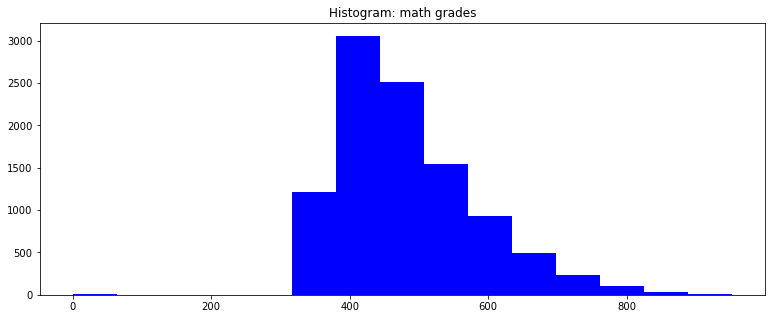

In [25]:
plt.figure(figsize=(13,5))
plt.hist(dataset1['NU_NOTA_MT'],bins=15, histtype='bar', color='blue')
plt.title('Histogram: math grades')
plt.show

-The average grade was around 482 from a total of 1000. This means that the majority of students did not score half of the math test. 

-The standart deviation for math test is incredibly high, probably because of the way Enem grades are calculated: less students do well in math so their score goes up, furthering them from the mean. 

### Crossing data

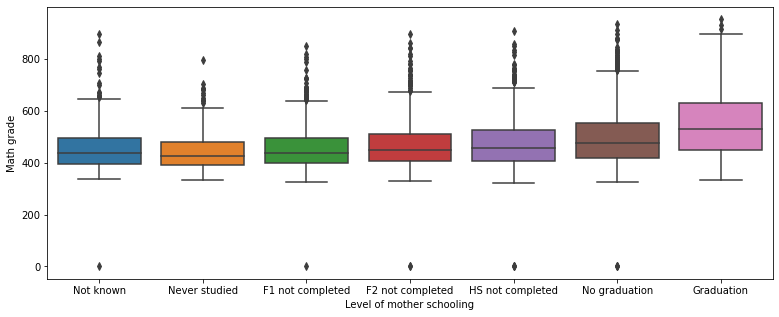

In [35]:
# Box plotting math grade x mother schooling
plt.figure(figsize=(13,5))
sns.boxplot(x=dataset1['Q002'],y=dataset1['NU_NOTA_MT'], order=['Not known','Never studied','F1 not completed', 
            'F2 not completed', 'HS not completed','No graduation', 'Graduation'])
plt.xlabel('Level of mother schooling')
plt.ylabel('Math grade')
plt.show()

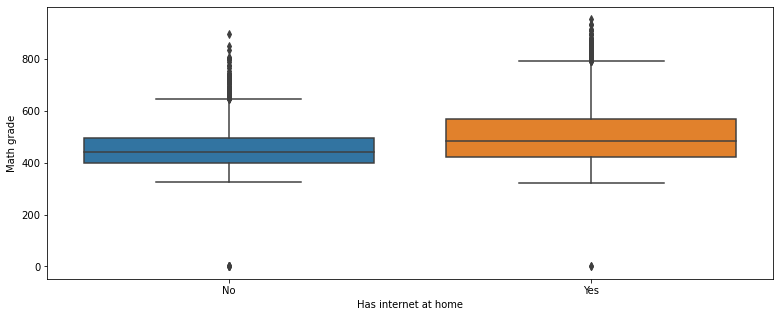

In [37]:
# Box plotting math grade x internet
plt.figure(figsize=(13,5))
sns.boxplot(x=dataset1['Q025'], y=dataset1['NU_NOTA_MT'])
plt.xlabel('Has internet at home')
plt.ylabel('Math grade')
plt.show()

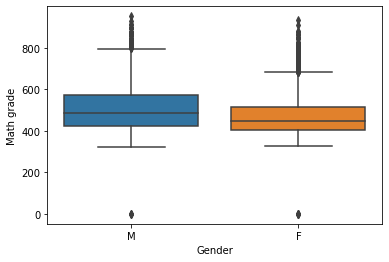

In [39]:
# Box plotting math grade x gender
sns.boxplot(x=dataset1['TP_SEXO'], y=dataset1['NU_NOTA_MT'])
plt.xlabel('Gender')
plt.ylabel('Math grade')
plt.show()

### Final Observations
1. Analysing the box plots, we can see that **math grade increases along with the level of mother schooling**. Students whose mother did not go through with high school/graduation have worse grades. Statiscal tests have to be conducted to verify the intensity of this correlation. 

2. **Having internet at home also seems to have a positive impact on the math grade** of the students. Statiscal tests have to be conducted to verify the intensity of this correlation. 

3. **Women scored less on the math test than man**. Statiscal tests have to be conducted to verify what variables may have influenced this. 